In [160]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [138]:
data = pd.read_csv(r"C:\Users\alexe\Desktop\Технологии программирования\Классификация KNN\mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [141]:
print("Ядовитые = ", len(data[data['class'] == 'p']))
print("Съедобные = ", len(data[data['class'] == 'e']))

#выборка относительно сбалансированна => в качестве оценки можно использовать accuracy

Ядовитые =  3916
Съедобные =  4208


### Кодирование

Все признаки являются категориальными
Закодируем их с помощью one-hot кодирования (не используем label, тк может создатся "иллюзия" иерархии)
class сделаем бинарным признаком
0 - съедобный, 1 - ядовитый

In [80]:
data['veil-type'].unique()

array(['p'], dtype=object)

In [81]:
#удалим столбец veil-type, тк в нем одно значение
data = data.drop(columns=['veil-type'])

In [127]:
data.loc[(data['class'] == 'e'), 'class'] = 0
data.loc[(data['class'] == 'p'), 'class'] = 1
data['class'] = pd.to_numeric(data['class'])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [128]:
data_columns = data.columns
data_categorial_columns = data.columns
data_categorial_columns = data_categorial_columns.drop('class')

In [129]:
data_encode = pd.get_dummies(data = data, dtype='int8', columns=data_categorial_columns)
data_encode

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


Количество признаков увеличелось с 23 до 117.

Посмотрим на корреляцию признаков
Для просмотра корреляции удобней перевести категориальный признаки в числовые через label кодирование

In [130]:
le = LabelEncoder()
data_label = data[data_columns].apply(lambda col: le.fit_transform(col))
data_label.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,3,3


In [86]:
#Количество признаков не изменилось => можно построить адекватную тепловую карту

<AxesSubplot:>

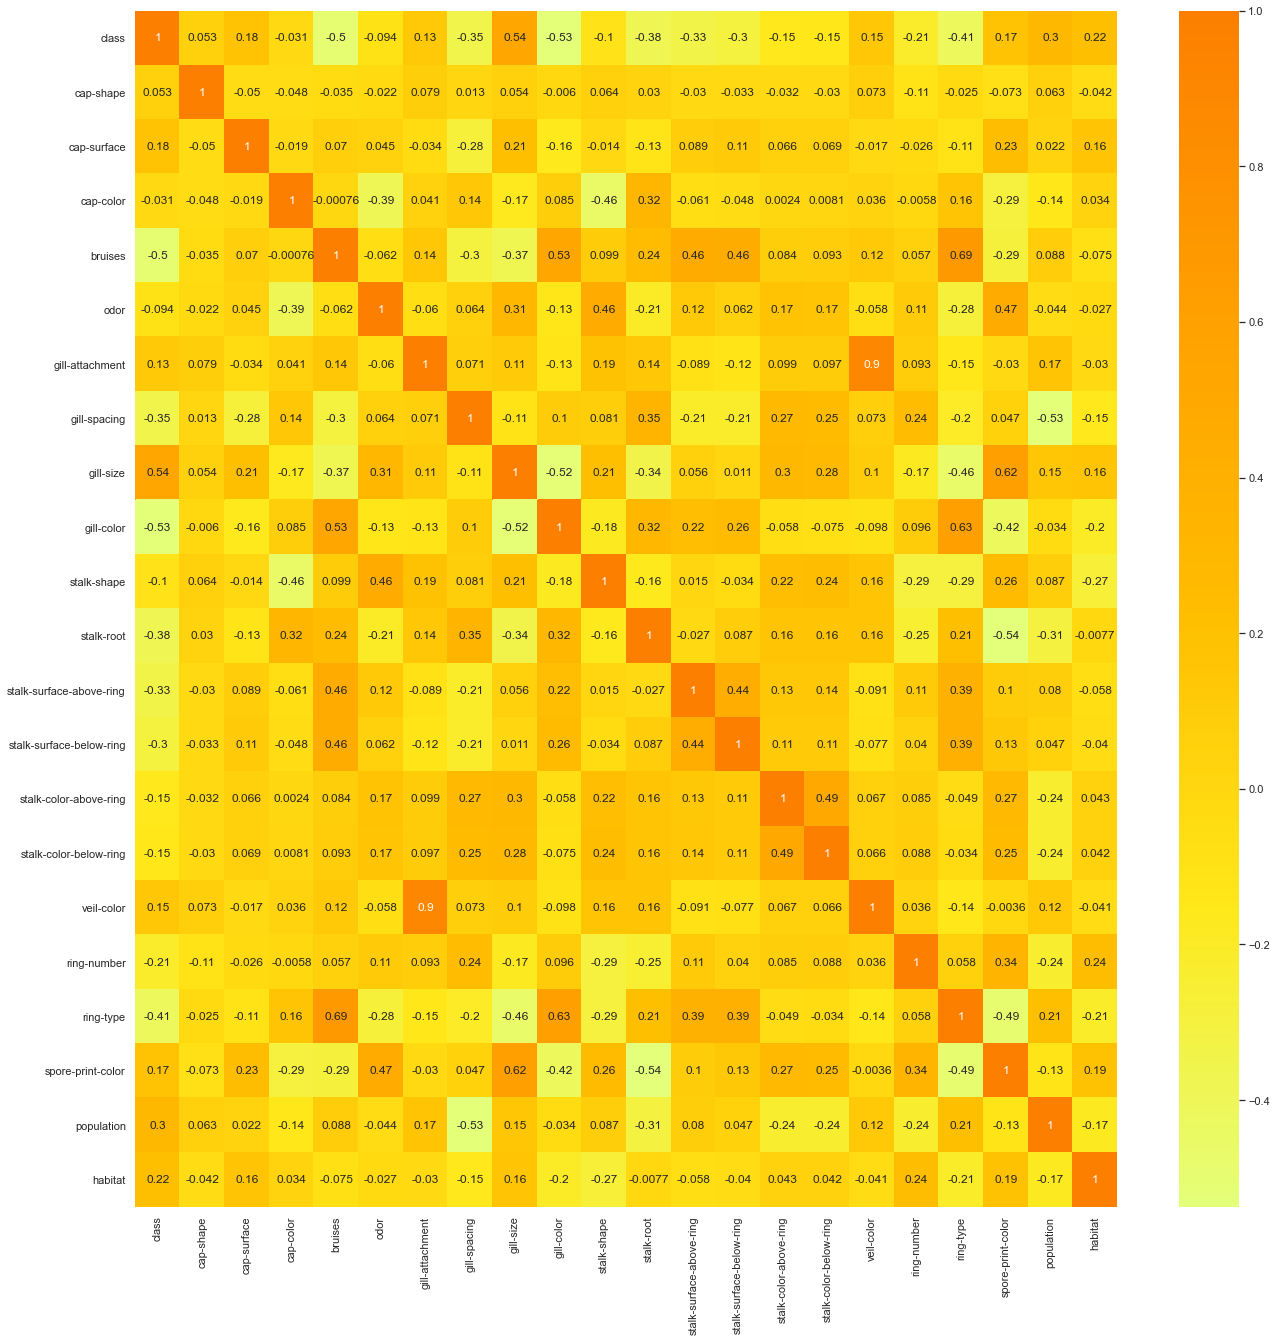

In [87]:
plt.figure(figsize = (22,22))

corr = data_label.corr()
sns.heatmap(corr, cmap = 'Wistia', annot=True)
#data

### KNN

In [173]:
X = data_encode.iloc[:,1:]
y = data_encode['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
data_train = pd.concat([X_train, y_train], sort=False, axis=1)
data_train['class']

3244    0
3739    1
2154    0
1344    0
7852    1
       ..
5226    1
5390    0
860     0
7603    1
7270    0
Name: class, Length: 5443, dtype: int64

Best K = 1
Best cross_val_score = 0.9980295566502463


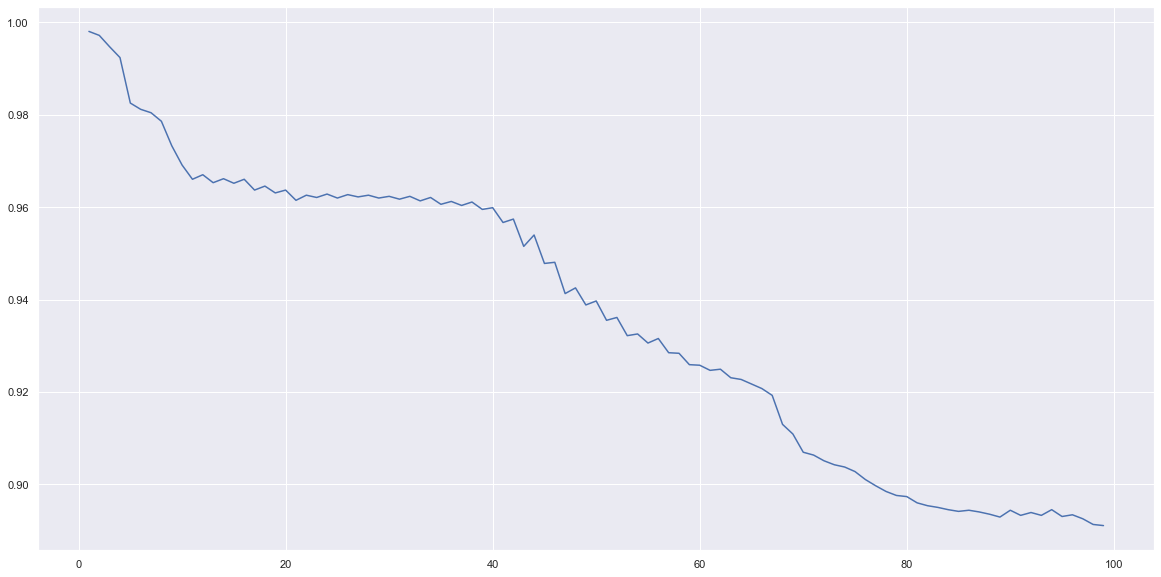

In [166]:
#переберем в лоб количество соседей
cv = KFold(n_splits=5, shuffle=False) # фиксируем разбиения! Выключаем перемешивание для повтора результатов

k_vals = np.arange(1, 100, 1)
quality_by_k = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=cv).mean() for k in k_vals
]

print("Best K =",k_vals[np.argmax(quality_by_k)])
print("Best cross_val_score =",np.max(quality_by_k))

plt.figure(figsize = (20,10))
plt.plot(k_vals, quality_by_k)

In [144]:
data_train.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
count,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,...,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000
mean,0.053279,0.000551,0.386184,0.107110,0.004042,0.448833,0.287342,0.000367,0.315084,0.397207,...,0.497887,0.213853,0.388756,0.261988,0.106743,0.035642,0.138710,0.042624,0.025537,0.480066
std,0.224611,0.023473,0.486918,0.309282,0.063453,0.497421,0.452564,0.019167,0.464592,0.489365,...,0.500041,0.410062,0.487513,0.439756,0.308814,0.185413,0.345676,0.202025,0.157765,0.499648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[1. 2. 3. 4. 5.]
1.0


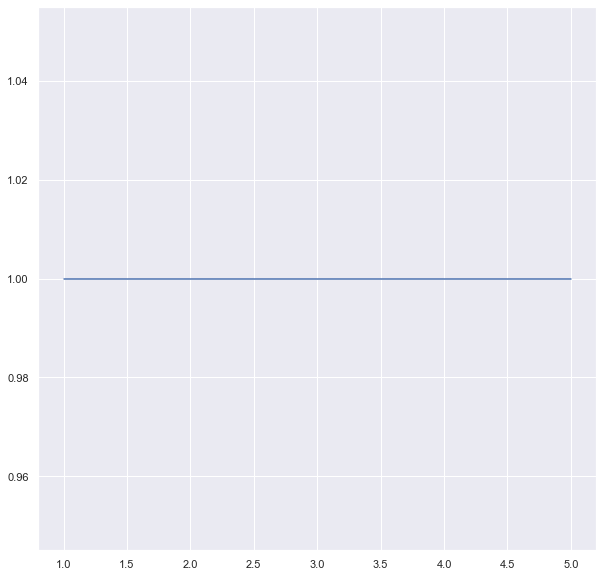

In [158]:
#подберем метрику
cv = KFold(n_splits=5, shuffle=False)

p_vals = np.linspace(1, 5, 5)
print(p_vals)

quality_by_p = [
    cross_val_score(KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=p), X_train, y_train, cv=cv).mean()
    for p in p_vals
]

print(p_vals[np.argmax(quality_by_p)])

plt.figure(figsize = (10,10))
plt.plot(p_vals, quality_by_p)

In [ ]:
#подберем параметры с помощью sklearn

In [169]:
# задаем набор параметров
params = {
    "n_neighbors": np.arange(1,10,1), 
    "p": np.arange(1, 5, 1)
}

In [214]:
#тупит
# search = GridSearchCV(KNeighborsClassifier(), params, n_jobs=2, 
#                       cv=cv, verbose=2)
# search.fit(X_train, y_train)

### Предсказания

In [180]:
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [183]:
y_predict = knn.predict(X_test)

In [192]:
y_predict = pd.array(y_predict)
y_true_predict = pd.DataFrame({'y_true':y_test, 'y_predict':y_predict})
y_true_predict

,y_true,y_predict
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
6217,1,1
7050,0,0
2957,0,0
5777,0,0


In [213]:
#подсчитаем количество совпадений и промахов
cnt_true = 0
cnt_false = 0

for i in range(len(y_true_predict)):
    if (y_true_predict.iloc[i][0] == y_true_predict.iloc[i][1]):
        cnt_true +=1
    else:
        cnt_false +=1
        
print("Корректно классифицировано = ", cnt_true)
print("Ошибочно классифицировано = ", cnt_false)


Корректно классифицировано =  2681
Ошибочно классифицировано =  0
